## Import Libraries

In [1]:
#import dependencies
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

## Loading And Exploring Datasets

In [2]:
#loading HR data 
hr_df = pd.read_csv('https://raw.githubusercontent.com/pydeveloperashish/Predicting-which-of-your-Employee-will-Quit-your-Company-Data-Science-Project/master/hr_data.csv')


In [3]:
#exploring datasets
hr_df.head()


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


## Exploratory Data Analysis

In [4]:
hr_df.info()  #description of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [5]:
hr_df.describe(include = 'all')

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [6]:
hr_df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [7]:
hr_df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [9]:
#employee dataset
from google.colab import files
em_df = files.upload()

Saving employee_satisfaction_evaluation (1).xlsx to employee_satisfaction_evaluation (1).xlsx


In [10]:
em_df = pd.read_excel('employee_satisfaction_evaluation (1).xlsx')

In [11]:
em_df.shape

(14999, 3)

In [12]:
em_df.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [13]:
em_df.isna().sum() #missing value count by column

EMPLOYEE #             0
satisfaction_level    27
last_evaluation       27
dtype: int64

In [14]:
em_df.describe()

,EMPLOYEE #,satisfaction_level,last_evaluation
count,14999.000000,14972.000000,14972.000000
mean,45424.627575,0.612830,0.716125
std,25915.900127,0.248714,0.171138
min,1003.000000,0.090000,0.360000
25%,22872.500000,0.440000,0.560000
50%,45448.000000,0.640000,0.720000
75%,67480.500000,0.820000,0.870000
max,99815.000000,1.000000,1.000000


In [15]:
54/em_df.size  #amount of missing data

0.0012000800053336889

In [16]:
%%timeit
final_df = pd.merge(hr_df,em_df,left_index=True,right_index=True) #time taken by merge method


1000 loops, best of 5: 1.04 ms per loop


In [ ]:
#%%timeit
#final_df = hr_df.set_index('employee_id').join(em_df.set_index('EMPLOYEE #')) #time taken by join method


100 loops, best of 5: 4.11 ms per loop


In [17]:
final_df = pd.merge(hr_df,em_df,left_index=True,right_index=True) #merging datasets 
final_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,1003,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,1005,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,1486,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,1038,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,1057,0.37,0.52


In [18]:
final_df.drop('EMPLOYEE #',axis=1,inplace=True) #dropping duplicate column after merging 'on' column

In [19]:
final_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [20]:
final_df.shape

(14999, 11)

In [21]:
final_df.isna().sum() #checking missing values

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [22]:
final_df = final_df.fillna(final_df.mean()) 


## Visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


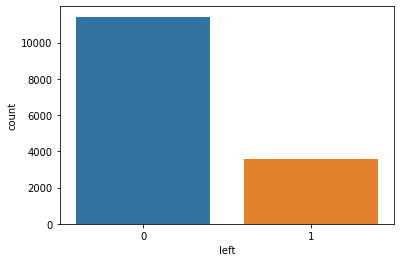

In [23]:
#visualizations 
# Count of employees who left and stayed
sns.countplot('left',data=final_df)

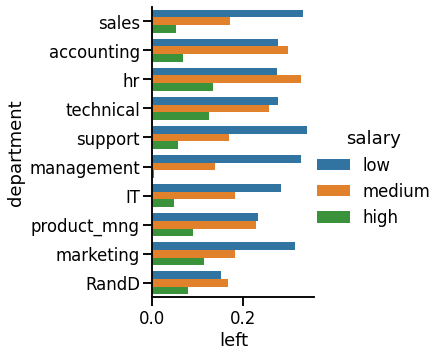

In [24]:
#number of employee left having respective salary range from each deptt.
# in general from each deptt employees having low salary left the company
sns.set_context('talk')
sns.catplot(x='left',y='department',data=final_df,hue='salary',kind='bar',ci=None)
#plt.xticks(rotation=90)
plt.show()

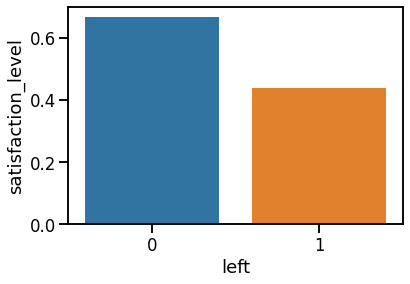

In [25]:
sns.barplot(x='left',y='satisfaction_level',data=final_df,ci=None) #Left employees had satisfaction level below 60%

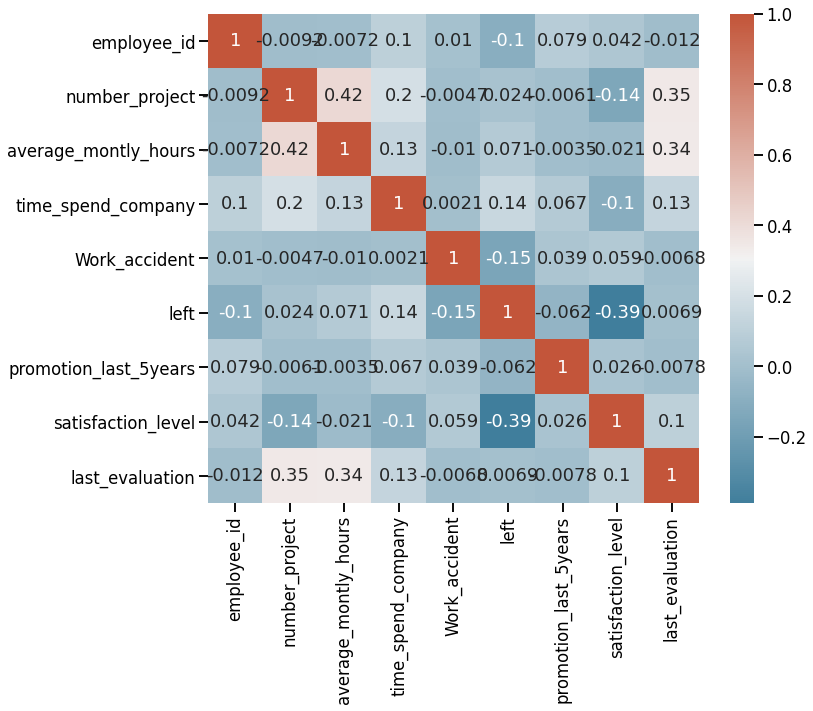

In [26]:
#correlation matrix
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(final_df.corr(),annot=True,cmap=cmap)
plt.show()

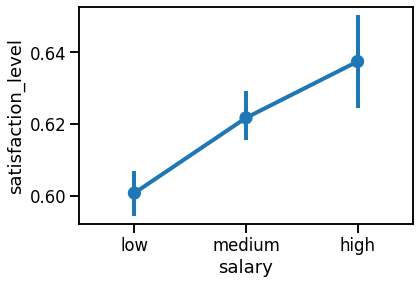

In [27]:
sns.pointplot(x='salary',y='satisfaction_level',data=final_df) #on an average employees having low salary had low satisfaction level

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

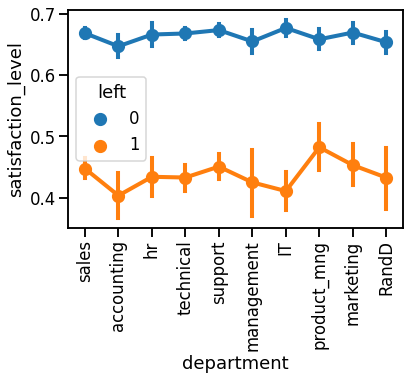

In [28]:
sns.pointplot(x='department',y='satisfaction_level',data=final_df,hue='left') #accounting deptt  employees who left had the least satisfaction level
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

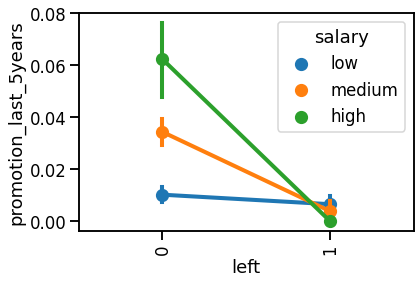

In [29]:
sns.pointplot(x='left',y='promotion_last_5years',data=final_df,hue='salary') #employees who got promotion in last five years didnt left
plt.xticks(rotation=90)

## Preprocessing and Model Evaluation 

In [37]:
#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [38]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

In [39]:
labels = ['salary','department']
le = LabelEncoder()
for i in labels:
    final_df[i] = le.fit_transform(final_df[i])


In [40]:
final_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,7,1,0.38,0.53
1,1005,5,262,6,0,1,0,7,2,0.80,0.86
2,1486,7,272,4,0,1,0,7,2,0.11,0.88
3,1038,5,223,5,0,1,0,7,1,0.72,0.87
4,1057,2,159,3,0,1,0,7,1,0.37,0.52


In [41]:
#splitting dataset to perform on test data
X = final_df.drop(['left'],axis=1)
y = final_df['left']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=43,test_size=0.3)

In [42]:
y_test.shape

(4500,)

In [43]:
#Making Pipeline steps to be fed to pipeline
steps_logreg = [('scaler',StandardScaler()),('logreg',LogisticRegression())]
steps_rf = [('scaler',StandardScaler()),('rf',RandomForestClassifier())]
steps_knn = [('scaler',StandardScaler()),('knn',KNeighborsClassifier())]
steps_dt = [('scaler',StandardScaler()),('dt',DecisionTreeClassifier())]

steps = [steps_logreg,steps_rf,steps_knn,steps_dt]

In [44]:
acc_dict = {} #dictionary to store accuracy values

In [45]:
def make_pipe(steps,X_train,y_train,X_test,y_test):
    '''construct a pipeline for the data and further give predictions and finally classification report 
    args: 
        steps (List) : the steps of each model for pipeline
        X_train ,  Y_train (split datasets): the data to be fed to models
        X_test,y_test (datasets ) : to evaluate models trained upon 
    prints :
        classifaction report for each model 
        '''
    for i in steps:
        pipeline = Pipeline(i)
        pipeline.fit(X_train,y_train)
        y_pred = pipeline.predict(X_test)
        acc_dict[i[1][0]] = accuracy_score(y_test,y_pred) * 100
        print(i[1][0],classification_report(y_test,y_pred))

In [46]:
make_pipe(steps,X_train,y_train,X_test,y_test)

logreg               precision    recall  f1-score   support

           0       0.81      0.93      0.86      3422
           1       0.57      0.31      0.40      1078

    accuracy                           0.78      4500
   macro avg       0.69      0.62      0.63      4500
weighted avg       0.75      0.78      0.75      4500

rf               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3422
           1       0.98      0.94      0.96      1078

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500

knn               precision    recall  f1-score   support

           0       0.97      0.98      0.97      3422
           1       0.92      0.90      0.91      1078

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500

dt   

In [47]:
acc_dict

{'dt': 96.84444444444445,
 'knn': 95.82222222222222,
 'logreg': 77.84444444444445,
 'rf': 98.06666666666666}

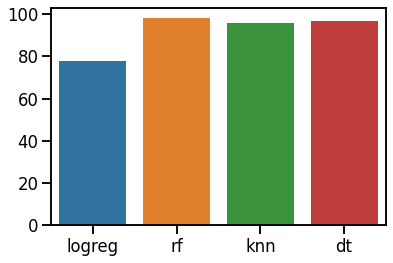

In [48]:
sns.barplot(x=list(acc_dict.keys()),y=list(acc_dict.values()))
# comparision of each model's accuracy on test data